# 6.2. Kategoryzacja za pomocą K-Means w 2D

K-Means jest prawdopodobnie najprostszym algorytmem klastrowania i przejdziemy krok po kroku przez jego proces nauczania. Sam schemat jest dość łatwy do zrozumienia, jednakże dobór parametrów uczenia może mieć wpływ na poprawność wyników.

## Generowanie danych w scikit-learn

Scikit-learn dostarcza kilka funkcji, które pozwalają na wygenerowanie zbiorów danych mogących posłużyć do sprawdzenia skuteczności wybranego algorytmu, a także do porównania różnych algorytmów w obrębie tej samej klasy problemów. Jesteśmy w stanie chociażby wygenerować różne zbiory do klastrowania, które pokazują ograniczenia poszczególnych algorytmów klasteryzacji.

Zaczniemy od klasycznego problemu, gdzie na płaszczyźnie 2D wygenerujemy zbiór danych, który wizualnie dzieli się na 3 skupiska i zobaczymy jak algorytm K-Means radzi sobie z ich podziałem.

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, labels = make_blobs(n_samples=1000, n_features=2, 
                       centers=3, random_state=3,
                       cluster_std=1.0)

In [3]:
import matplotlib.pyplot as plt

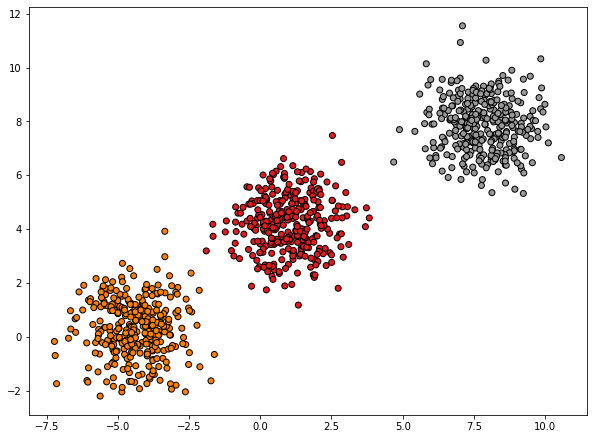

In [4]:
plt.figure(figsize=(10.0, 7.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, 
            cmap="Set1", edgecolor=(0, 0, 0, 1))

## Schemat działania algorytmu

Na samym początku, algorytm K-Means wybiera dokładnie **K** różnych wektorów, które stają się początkowymi centrami (wektorami kodowymi) dla klastrów. Centra te będą zmieniać się z każdą iteracją algorytmu, teoretycznie aż do osiągnięcia stabilności.

W każdej kolejnej iteracji, K-Means przypisuje każdemu z punktów zbioru uczącego najbliższy klaster. Odległość od klastra definiuje się poprzez odległość do jego wektora kodowego. Po przypisaniu wszystkich, następuje ponowne przeliczenie centrów dla klastrów. Robi się to poprzez obliczenie średniego wektora dla wszystkich wektorów wejściowych, które w danej iteracji wpadły do tego klastra (stąd **means** w nazwie).

Algorytm kończy proces uczenia w momencie gdy różnica pomiędzy długościami wszystkich wektorów kodowych pomiędzy kolejnymi iteracjami nie jest większa od określonego progu. Dodatkowo, określa się też maksymalną liczbę iteracji, aby mieć pewność, że nauczanie nie będzie trwało zbyt długo.

## Podstawowe klastrowanie z wykorzystaniem K-Means

Patrząc na rozkład wygenerowanych danych na płaszczyźnie, można łatwo stwierdzić, że mamy 3 klastry. Spróbujemy teraz nauczyć model K-Means, który będzie dzielił płaszczyznę na 3 obszary.

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3, random_state=2019, 
                init="random", n_init=1, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=3,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=2019,
       tol=0.0001, verbose=0)

In [7]:
import numpy as np

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [9]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

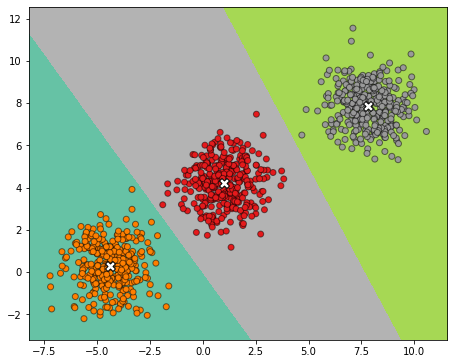

In [10]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap="Set2", origin="lower")
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, 
            cmap="Set1", edgecolor=(0, 0, 0, 0.5))
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
            marker="X", c="white", edgecolor=(0, 0, 0, 1), s=100.0)

In [11]:
def visualize_kmeans(kmeans, X, labels):
    x_min, x_max = X[:, 0].min() * 1.25, X[:, 0].max() * 1.25
    y_min, y_max = X[:, 1].min() * 1.25, X[:, 1].max() * 1.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation="nearest",
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap="Set2", origin="lower")
    plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, 
                cmap="Set1", edgecolor=(0, 0, 0, 0.5))
    plt.scatter(x=kmeans.cluster_centers_[:, 0], 
                y=kmeans.cluster_centers_[:, 1],
                marker="X", c="white", edgecolor=(0, 0, 0, 1), 
                s=100.0)

## Wizualizacja iteracji K-Means

Prześledźmy kolejne iteracje algorytmu K-Means, aby nabrać lepszej intuicji co do sposobu jego treningu.

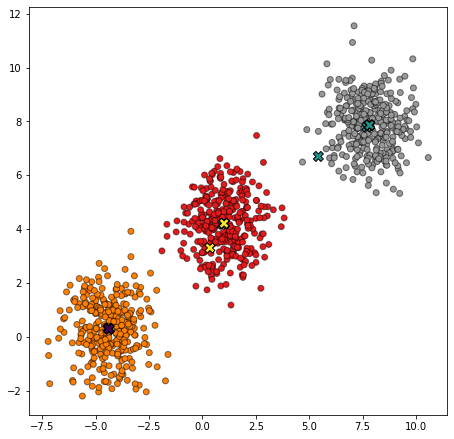

In [12]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, 
            cmap="Set1", edgecolor=(0, 0, 0, 0.5))

for iters in range(1, 11):
    kmeans = KMeans(n_clusters=3, random_state=2019, 
                    init="random", n_init=1, max_iter=iters)
    kmeans.fit(X)
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                marker="X", c=[0, 1, 2], edgecolor=(0, 0, 0, 1), s=100.0)

## Wykorzystanie K-Means dla nowych punktów

W trakcie uczenia, algorytm K-Means oblicza dokładnie K punktów, które stają się centrami stworzonych klastrów. Jeśli chcemy wykorzystać je do klasyfikacj nowych punktów, to musimy obliczyć odległości od wszystkich centrów i wybrać ten, który jest najbliżej.

## Dobór liczby klastrów

Dla powyższego przykładu ręcznie określiliśmy liczbę klastrów na 3. Zrobiliśmy to tylko dlatego, że sami wygenerowaliśmy dane wg schematu, który zakładał trzy podgrupy. Typowo nie będziemy jednak wiedzieć 

In [13]:
kmeans = KMeans(n_clusters=4, random_state=2019, 
                init="random", n_init=1, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=4,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=2019,
       tol=0.0001, verbose=0)

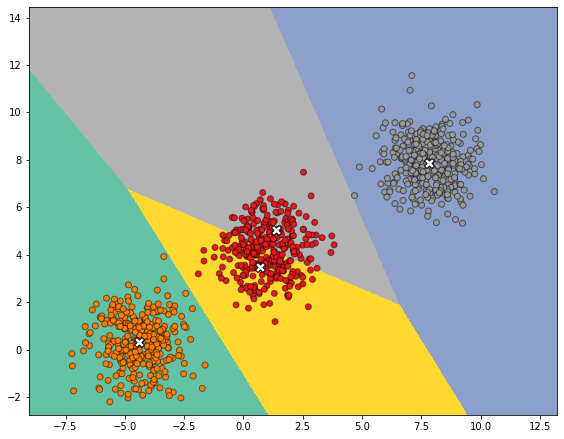

In [14]:
plt.figure(figsize=(12.5, 7.5))
visualize_kmeans(kmeans, X, labels)

## Problemy nierozwiązywalne przez K-Means

K-Means sprawdza się dobrze gdy chodzi o pewne klasy problemów, które są liniowo separowalne. Dzieje się tak dlatego, iż pod spodem korzystamy z metryki euklidesowej. Wygenerujmy jednak inny zestaw danych, który dla człowieka jest intuicyjnie prosty do rozwiązania. 

In [15]:
from sklearn.datasets import make_circles

In [16]:
X_circle, labels_circle = make_circles(n_samples=1000, noise=0.05,
                                       factor=0.5, random_state=326321)

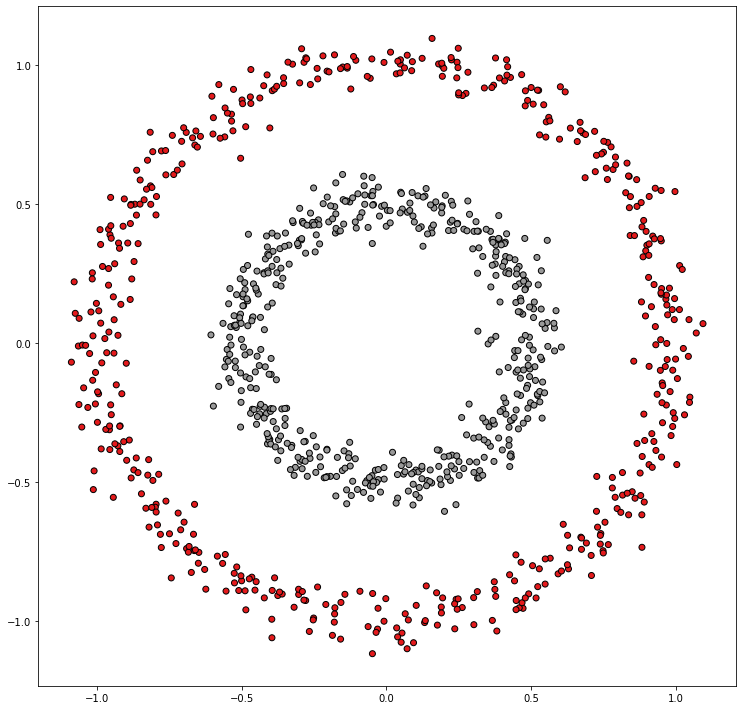

In [17]:
plt.figure(figsize=(12.5, 12.5))
plt.scatter(x=X_circle[:, 0], y=X_circle[:, 1], c=labels_circle, 
            cmap="Set1", edgecolor=(0, 0, 0, 1))

In [18]:
kmeans = KMeans(n_clusters=2, random_state=1, 
                init="random", n_init=1, max_iter=1)
kmeans.fit(X_circle)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

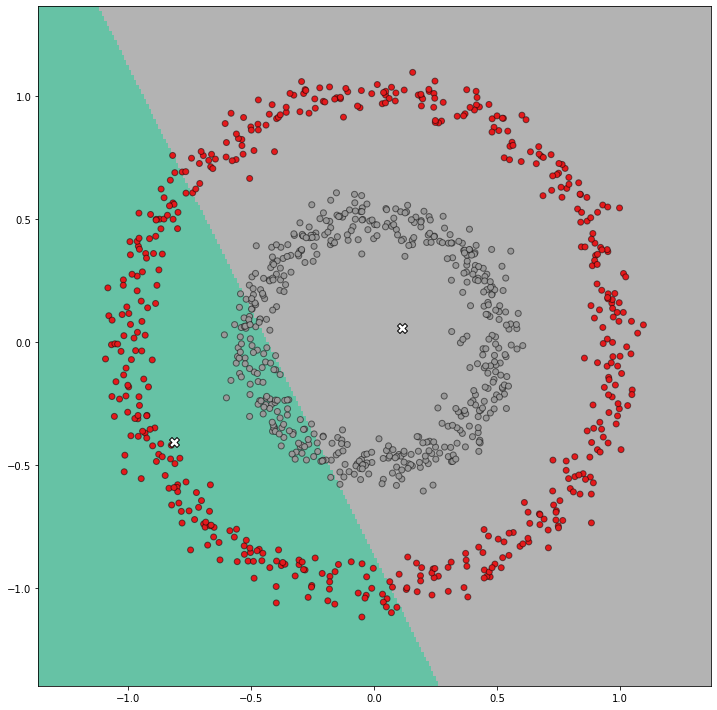

In [19]:
plt.figure(figsize=(12.5, 12.5))
visualize_kmeans(kmeans, X_circle, labels_circle)

W powyższym przykładzie ograniczyliśmy sobie maksymalną liczbę iteracji do 1, przez co algorytm tylko jednokrotnie dokonał liczenia średnich wektorów dla każdego klastra. Spróbujemy jeszcze pozwolić algorytmowi uczyć się przez więcej, bo aż 1000 iteracji.

In [20]:
kmeans = KMeans(n_clusters=2, random_state=1, 
                init="random", n_init=1, max_iter=1000)
kmeans.fit(X_circle)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

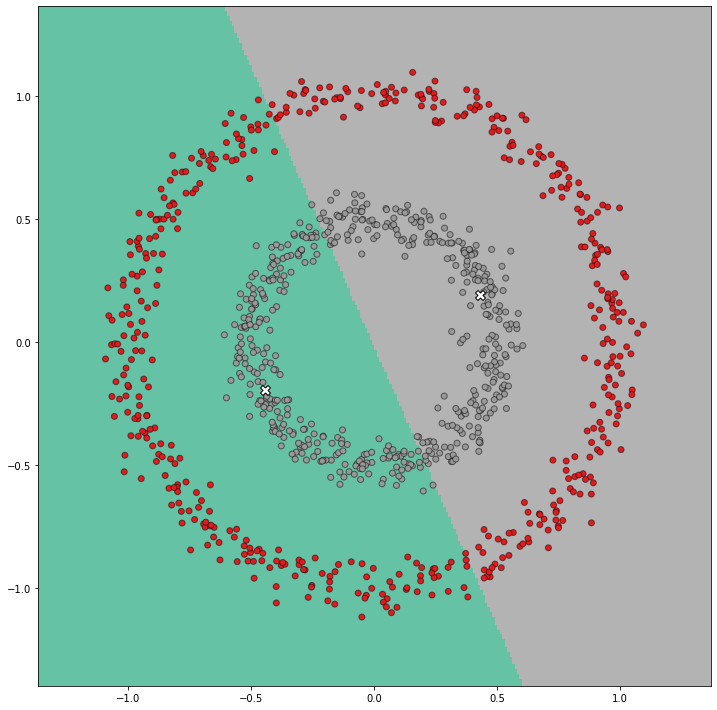

In [21]:
plt.figure(figsize=(12.5, 12.5))
visualize_kmeans(kmeans, X_circle, labels_circle)